In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('xtick', labelsize=8) 
matplotlib.rc('ytick', labelsize=8) 
import json
import os
import load_data

## Original Model

In [ ]:
in_domain_new, cross_domain_new, in_domain, cross_domain, in_domain_nm, cross_domain_nm = load_data.load()

### Plots

In [ ]:
fig, axes = plt.subplots(5, 1, dpi=200, figsize = (7, 12))
fig.tight_layout()
for i, key in enumerate(in_domain):
    axes[i].plot(in_domain[key][0], in_domain[key][1])
    axes[i].set_title(key, fontsize = 8)
    axes[i].set_ylabel('Accuracy', fontsize = 10)
    if i == len(in_domain.keys())-1:
        axes[i].set_xlabel('Iteration', fontsize = 10)

In [ ]:
fig, axes = plt.subplots(6, 1, dpi=200, figsize = (7, 15))
fig.tight_layout()
for i, key in enumerate(cross_domain):
    axes[i].plot(cross_domain[key][0], cross_domain[key][1])
    axes[i].set_title(key, fontsize = 12)
    axes[i].set_ylabel('Accuracy', fontsize = 10)
    if i == len(cross_domain.keys())-1:
        axes[i].set_xlabel('Iteration', fontsize = 10)

### Tables

In [ ]:
print('-'*15, 'ORIGINAL MODEL WITH MASKING', '-'*15, '\n')
print('==== IN-DOMAIN ====')
print('dataset\t|\tmaximum  \t|\taverage')
print('-'*49)
for key in in_domain:
    print(f'{key}\t|\t{max(in_domain[key][1])*100:.3f} %\t|\t{sum(in_domain[key][1][-10:])/min((10, len(in_domain[key][1])))*100:.3f} %')
print('\n\n==== CROSS-DOMAIN ====')
print('source-target\t|\tmaximum  \t|\taverage')
print('-'*57)
for key in cross_domain:
    print(f'{key}\t|\t{max(cross_domain[key][1])*100:.3f} %\t|\t{sum(cross_domain[key][1][-10:])/min((10, len(cross_domain[key][1])))*100:.3f} %')

In [ ]:
print('-'*10, 'ORIGINAL MODEL WITHOUT MASKING', '-'*10, '\n')
print('==== IN-DOMAIN ====')
print('dataset\t|\tmaximum  \t|\taverage')
print('-'*49)
for key in in_domain_nm:
    print(f'{key}\t|\t{max(in_domain_nm[key][1])*100:.3f} %\t|\t{sum(in_domain_nm[key][1][-10:])/min((10, len(in_domain_nm[key][1])))*100:.3f} %')
print('\n\n==== CROSS-DOMAIN ====')
print('source-target\t|\tmaximum  \t|\taverage')
print('-'*57)
for key in cross_domain_nm:
    print(f'{key}\t|\t{max(cross_domain_nm[key][1])*100:.3f} %\t|\t{sum(cross_domain_nm[key][1][-10:])/min((10, len(cross_domain_nm[key][1])))*100:.3f} %')

## Modified Model

In [ ]:
print('-'*21, 'MODIFIED MODEL', '-'*21, '\n')
print('dataset\t|\tmaximum  \t|\taverage')
print('-'*49)
for key in in_domain_new:
    print(f'{key}\t|\t{max(in_domain_new[key][1])*100:.3f} %\t|\t{sum(in_domain_new[key][1][-10:])/min((10, len(in_domain_new[key][1])))*100:.3f} %')

print('\n\nsource-target\t|\tmaximum  \t|\taverage')
print('-'*57)
for key in cross_domain_new:
    print(f'{key}\t|\t{max(cross_domain_new[key][1])*100:.3f} %\t|\t{sum(cross_domain_new[key][1][-10:])/min((10, len(cross_domain_new[key][1])))*100:.3f} %')

## Bert tagging

In [34]:
with open(os.path.join('output', 'geoparsing','eval_results.txt'), encoding='utf-8') as f:
    temp = f.readlines()
bert_data = {}
for line in temp:
    if not line or line == '\n':
        continue
    splits = line.split('_')
    if bert_data.get(splits[0], 0):
        right = splits[1].split('=')
        bert_data[splits[0]][right[0].strip()] = float(right[1].strip().replace('\n', ''))
    else:
        bert_data[splits[0]] = {}
        right = splits[1].split('=')
        bert_data[splits[0]][right[0].strip()] = float(right[1].strip().replace('\n', ''))

iterations = list(bert_data.keys())
for i in range(len(iterations)):
    iterations[i] = int(iterations[i])
iterations = sorted(iterations)
losses = list()
recalls = list()
precisions = list()
f1s = list()
for it in iterations:
    losses.append(bert_data[str(it)]['loss'])
    recalls.append(bert_data[str(it)]['recall'])
    precisions.append(bert_data[str(it)]['precision'])
    f1s.append(bert_data[str(it)]['f1'])

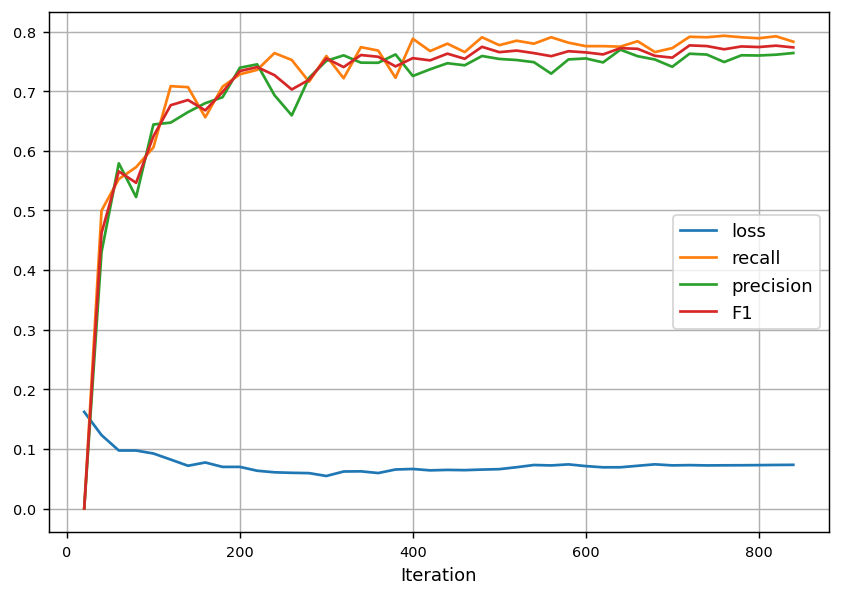

In [38]:
fig = plt.figure(dpi=130)
ax = fig.add_axes([0,0,1,1])
ax.plot(iterations, losses)
ax.plot(iterations, recalls)
ax.plot(iterations, precisions)
ax.plot(iterations, f1s)
ax.legend(['loss', 'recall', 'precision', 'F1'])
ax.set_xlabel('Iteration')
plt.grid()

In [39]:
last = str(max(iterations))
print(bert_data[last]['precision'])
print(bert_data[last]['recall'])
print(bert_data[last]['f1'])

0.7639450282942603
0.7829328914664457
0.7733224222585924
